# Analyze Worldwide Box Office Data with Seaborn and Python

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Data Loading and Exploration

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Visualizing the Target Distribution

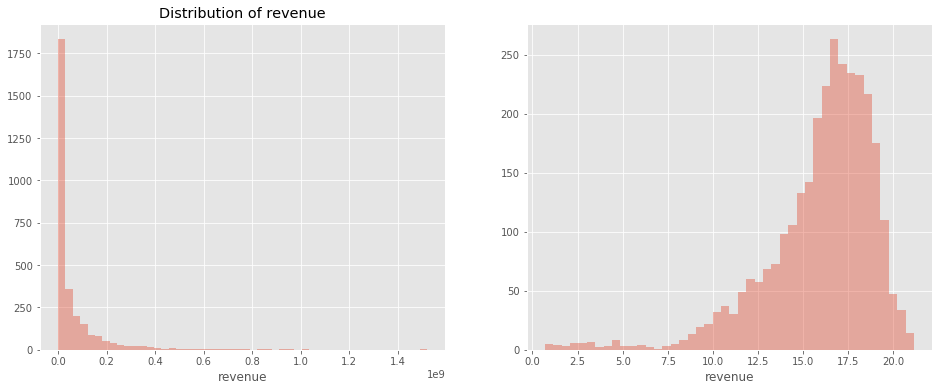

In [3]:
fig,ax =plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train['revenue'],kde = False);
plt.title('Distribution of revenue');
plt.subplot(1,2,2)
sns.distplot(np.log1p(train['revenue']),kde= False);


In [4]:
train['log_revenue'] = np.log1p(train['revenue'])

Relationship between Film Revenue and Budget

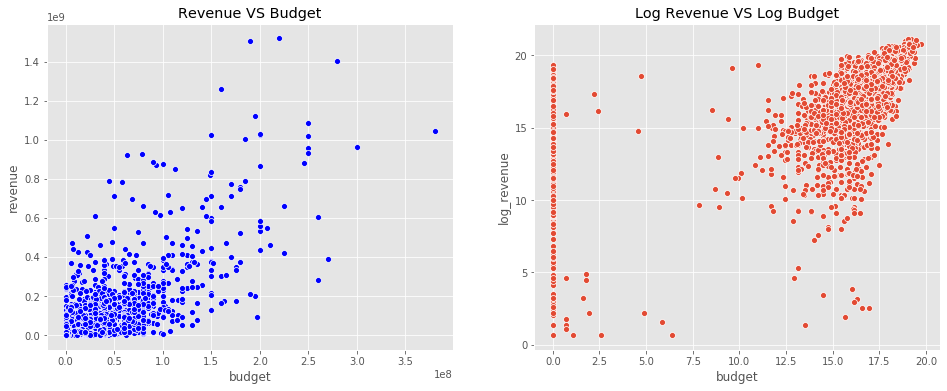

In [6]:
fig,ax =plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(train['budget'],train['revenue'],color='b')
plt.title('Revenue VS Budget');
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(train['budget']),(train['log_revenue']));
plt.title("Log Revenue VS Log Budget");

In [7]:
train['Log_Budget'] = np.log1p(train['budget'])
test['Log_Budget'] = np.log1p(test['budget'])

Does having an Official Homepage Affect Revenue?

In [8]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                                   4
http://www.lordoftherings.net/                                      2
http://www.thehobbit.com/                                           2
http://www.stakelandthefilm.com/                                    1
http://jackthegiantkiller.warnerbros.com                            1
http://www.hollywoodlandmovie.com/                                  1
http://marvel.com/movies/movie/221/guardians_of_the_galaxy_vol_2    1
http://www.godsnotdead.com/                                         1
http://smurfhappens.com                                             1
http://www.sonypictures.com/homevideo/talladeganights/              1
Name: homepage, dtype: int64

In [9]:
train['has_homepage']=0
train.loc[train['homepage'].isnull()==False,'has_homepage'] =1
test['has_homepage'] =0
test.loc[test['homepage'].isnull()==False,'has_homepage']=1

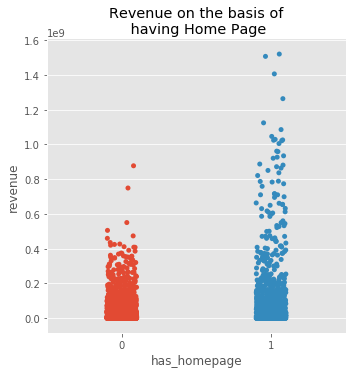

In [11]:
sns.catplot(x = 'has_homepage',y= 'revenue',data=train);
plt.title('Revenue on the basis of\n having Home Page');

Distribution of Languages in Film

In [12]:
lang_data = train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10)).index]


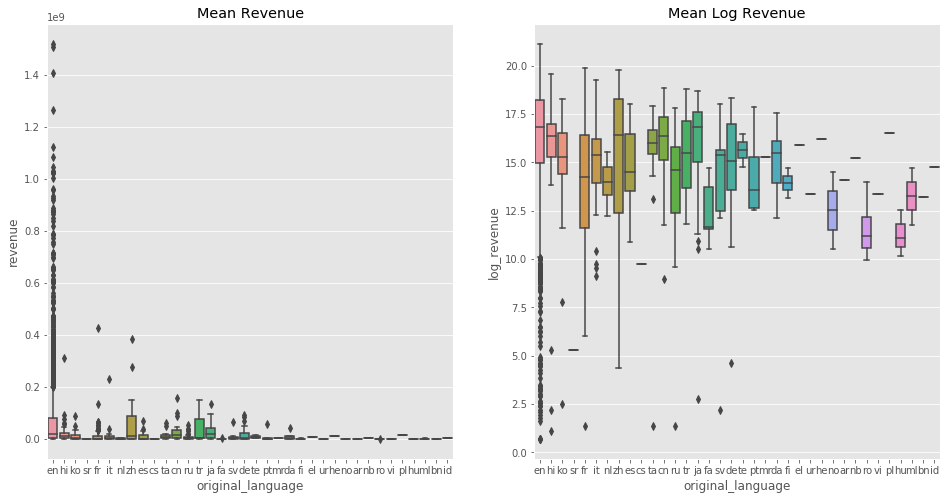

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x='original_language',y= 'revenue',data= train);
plt.title('Mean Revenue')
plt.subplot(1,2,2)
sns.boxplot(x= 'original_language',y= 'log_revenue',data=train);
plt.title('Mean Log Revenue');

Frequent Words in Film Titles and Descriptions

In [14]:
#pip install wordcloud

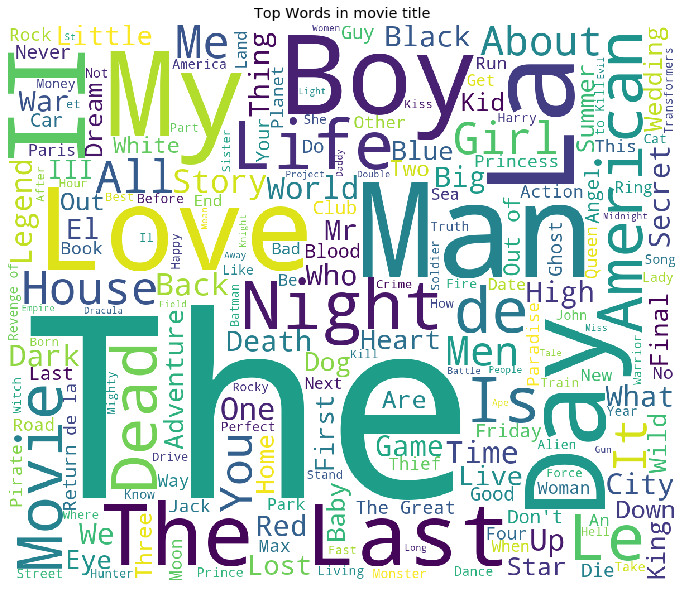

In [15]:
from wordcloud import WordCloud
text = ' '.join(train['original_title'].values)
word = WordCloud(max_font_size =None,background_color = 'white',width=1200,height = 1000).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(word)
plt.title('Top Words in movie title')
plt.axis('off')
plt.show()

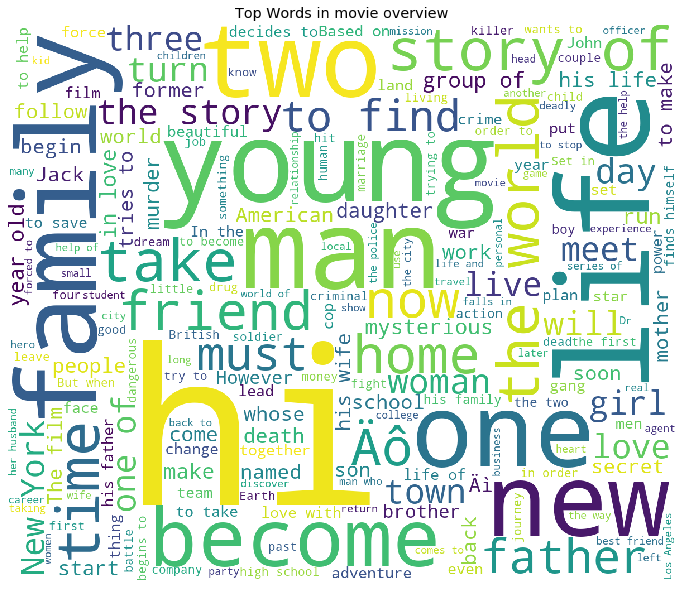

In [16]:
text = ' '.join(train['overview'].fillna('').values)
word = WordCloud(max_font_size =None,background_color = 'white',width=1200,height = 1000).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(word)
plt.title('Top Words in movie overview')
plt.axis('off')
plt.show()